# 目录结构
1. 概述
2. 数据
3. 实施流程
4. 代码实现
    - 4.1导入包
    - 4.2加载数据集
    - 4.3描述性统计分析
    - 4.4基于数据分析的假设
    - 4.5可视化数据分析
    - 4.6整理、清洗数据
    - 4.7构建模型并预测结果
    - 4.8模型评估
    - 4.9提交预测结果

# 泰坦尼克号——来自灾难的机器学习

## 1. 概述
&emsp;&emsp;泰坦尼克号的沉没是历史上最臭名昭著的沉船事件之一。1912 年 4 月 15 日，在她的首次航行中，被广泛认为“永不沉没”的泰坦尼克号在与冰山相撞后沉没。不幸的是，没有足够的救生艇供船上每个人使用，导致 2224 名乘客和船员中有 1502 人死亡。

&emsp;&emsp;虽然幸存中涉及到一些运气成分，但似乎有些人比其他人更有可能幸存。

&emsp;&emsp;使用乘客数据（即姓名、年龄、性别、社会经济阶层等），建立一个预测模型来回答以下问题：“什么样的人更有可能幸存？” 

## 2. 数据
&emsp;&emsp;有两个相似的数据集，一个是训练集`train.csv`，另一个是测试集`test.csv`。


&emsp;&emsp;`train.csv `包含乘客子集的详细信息（准确地说是 891 人），揭示了他们是否幸存，也称为“基本事实”。`test.csv` 数据集包含类似的信息，但没有透露每位乘客是否幸存，预测这些结果是我们的工作，即：使用你在 `train.csv` 数据中找到的模式，预测船上的其他 418 名乘客（在 `test.csv `中找到）是否幸存。

- 'PassengerId'：乘客编号
- 'Survived'：幸存与否
- 'Pclass'：票价等级
- 'Name'：乘客姓名
- 'Sex'：乘客性别
- 'Age'：乘客年龄
- 'SibSp'：在船的兄弟姐妹或配偶数量
- 'Parch'：在船父母或孩子数量
- 'Ticket'：票号
- 'Fare'：票价
- 'Cabin'：客舱号
- 'Embarked'：登机港口

## 3. 实施流程
<p>&emsp;&emsp;（1）了解、分析问题；<p>
<p>&emsp;&emsp;（2）获取训练集和测试集；<p>
<p>&emsp;&emsp;（3）进行数据整理和清洗；<p>
<p>&emsp;&emsp;（4）分析识别模式并探索数据，进行特征处理；<p>
<p>&emsp;&emsp;（5）建模、预测和解决问题；<p>
<p>&emsp;&emsp;（6）提交结果。

【注】我们要解决的问题是：从训练集中训练出来的模型是否可以根据给定的不包含幸存信息的测试集，确定测试集中的这些乘客是否幸存。有几个需要注意的重点：

&emsp;&emsp;i）1912 年 4 月 15 日，泰坦尼克号在与冰山相撞后沉没，2224 名乘客和船员中有 1502 人遇难，即32%的存活率；<p>
&emsp;&emsp;ii）沉船事故导致生命损失的原因之一是没有足够的救生艇供乘客和船员使用；<p>
&emsp;&emsp;iii）尽管在沉没中幸存下来有一些运气成分，但某些人群比其他人群更有可能幸存下来，例如妇女、儿童和上层阶级。

## 4. 代码实现

### （1）导入包

In [1]:
import warnings
warnings.filterwarnings("ignore") #忽略警告信息

# 数据处理清洗包
import pandas as pd
import numpy as np
import random as rnd

# 可视化包
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习算法相关包
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### （2）加载数据集

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df] # 合并数据

### （3）描述性统计分析

In [3]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# 对缺失值进行查看
print(train_df.isnull().sum())
print('_'*40)
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**哪些特征包含缺失值（空值，null,nan)?**

- 在训练集中，缺失值数目 Cabin > Age > Embarked；
- 在测试集中，缺失值数目 Cabin > Age > Fare。

In [6]:
# round()保留小数点两位
round(train_df.describe(percentiles=[.5, .75, .8, .9, .99]), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
80%,713.00,1.00,3.00,41.00,1.00,1.00,39.69
90%,802.00,1.00,3.00,50.00,1.00,2.00,77.96
99%,882.10,1.00,3.00,65.87,5.00,4.00,249.01
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


**对样本中数值特征的分布**
- PassengerId：样本总数为891人，约占泰坦尼克号上实际乘客人数（2,224人）的40%；
- Survived： 是具有 0 或 1 值的二分类变量，并且大约 38% 的样本存活，代表实际存活率32%；
- Pclass：大多数乘客（>50%)的票价等级是三等票（数字3代表票的等级）；
- Age：年龄在 65-80 岁之间的老年乘客很少 (<1%)；
- SibSp：近 30% 的乘客有兄弟姐妹或配偶一同登机；
- Parch：大多数乘客 (>75%) 没有与父母或孩子一起旅行；
- Fare：票价差异很大，少数乘客 (<1%) 支付高达 512 美元。

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**样本中分类特征的分布**
- Name：名称在数据集中是唯一的（count=unique=891）；
- Sex：性别变量有两个可能的值，男性占 65%（top=male，freq=577/891）;
- Ticket：票号具有高比例 (22%) 的重复值 (unique=681)；
- Cabin：客舱号在样本中也具有较多重复项，说明存在几名乘客共用一个小舱的现象；
- Embarked：登船港口有三个可能的值，大多数乘客是S口。

### （4）基于数据分析的假设

In [8]:
# 将类别特征进行数字化
from sklearn.preprocessing import LabelEncoder

# 将训练集赋值给临时变量，用于查看相关性
train_df_tmp = pd.read_csv('./data/train.csv')

In [9]:
encoder = LabelEncoder()

train_df_tmp['Name'] = encoder.fit_transform(train_df_tmp['Name'])
train_df_tmp['Sex'] = encoder.fit_transform(train_df_tmp['Sex'])
train_df_tmp['Ticket'] = encoder.fit_transform(train_df_tmp['Ticket'])
train_df_tmp['Cabin'] = encoder.fit_transform(train_df_tmp['Cabin'])
train_df_tmp['Embarked'] = encoder.fit_transform(train_df_tmp['Embarked'])

**我们想知道每个特征与幸存Survived的相关性如何，**
- PassengerId 乘客编号可能会从训练数据集中删除，因为它对幸存没有作用；
- Name 名字特征比较不规范，可能也对幸存没有直接贡献，因此可能会被丢弃;
- Age 年龄特征与幸存相关;
- Ticket 票号包含较高重复率(22%)(unique=681)，因此可能会从我们的分析中删除；
- Cabin 客舱号可能被丢弃，因为它在训练和测试集中缺失值过多（数据高度不完整）；
- Embarked 登船港口可能与幸存或其他重要特征相关。

In [10]:
# Survived与其他特征相关性
train_df_tmp.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


**通过corr()进行特征分析**
- **Pclass** 观察到 Pclas和Survived 之间有显著的相关性，因此在模型中应包含此特征；
- **Sex** 的相关性非常高，因此在模型中应包含性别特征;
- **SibSp 和 Parch** 这两个特征对于某些值与Survived具有相关性，最好从这些单独的特征中派生一个特征或一组特征，使得与Survived有显著相关性。

### （5）可视化数据分析

**分析数值特征 Age 与 Survived 相关性**

首先了解数值特征Age与我们的解决方案目标（Survived）之间的相关性。直方图对于分析连续数值变量很有用。

- 婴儿（年龄<=4）的存活率很高；
- 最年长的乘客（年龄 = 80）幸存下来；
- 大部分15-25 岁的人无法生存；
- 大多数乘客的年龄在 15-35 岁之间。

这个简单的分析证实了后续工作我们应该：
- 在模型训练中考虑年龄特征 Age；
- 完成年龄特征的缺失值处理；
- 捆绑年龄组。 

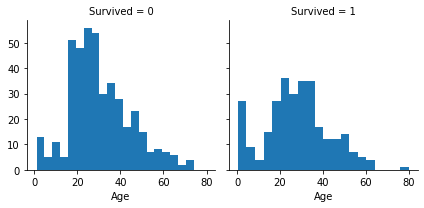

In [11]:
#FacetGrid(data, row, col, hue, height, aspect, palette, ...)
g = sns.FacetGrid(train_df, col='Survived')  
g.map(plt.hist, 'Age', bins=20)

**分析有序分类特征 Pclass（票价） 与 Survived 相关性**
- Pclass=3 有大多数乘客，但大多数没有幸存；
- Pclass=2 和 Pclass=3 的婴儿乘客大多幸存下来；
- Pclass=1 中的大多数乘客幸存下来；
- Pclass 因乘客年龄分布而异。

综上分析，应该将Pclass纳入模型训练之中。

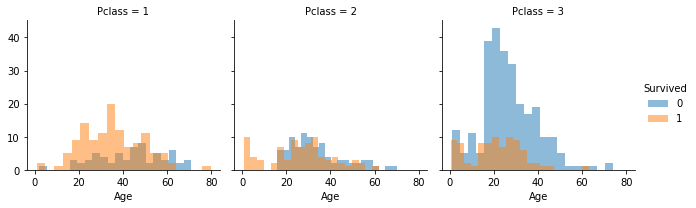

In [12]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived') 
# 行使用Age的原因：之前的分类汇总知道Age与Survived具有相关性
# 接下来一起研究，年龄，票价等级和幸存这三者之间的关系
grid.map(plt.hist, 'Age', alpha=0.5, bins=20) 
grid.add_legend();

**分析无序分类特征 Embarked（登机港口） 与 Survived 相关性**
- Embarked=S 和 Q 中，女性乘客的存活率远高于男性；Embarked=C 中，男性的存活率较高。这可能是 Embarked 和 Sex 相关，而 Sex 和 Survived 相关，进而造成Embarked与Survived间接相关；
- 对于同一票价等级和同一性别，不同登船港口的存活率不同。

综上分析，在模型训练中应该：添加 Sex 和 Embarked 特征。 

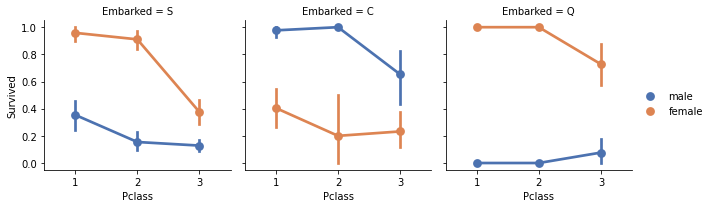

In [13]:
grid = sns.FacetGrid(train_df, col='Embarked')
# sns.pointplot 绘制点图函数，绘制出不同登船口下票价等级，幸存率和性别之间的关系
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

**分析数值特征 Fare（票价） 与 Survived 相关性**

将分类特征（具有非数值）和数字特征相关联，可以考虑将 Embarked（分类非数值）、Fare（连续数值）与 Survived（二分类数值）相关联。

- 支付更高票价的乘客能够更好地幸存，并且幸存率具有较明显的票价区间性；
- 不同的登船港口有不同的存活率。

因此，应该考虑捆绑票价特征Fare，并纳入模型训练中。 

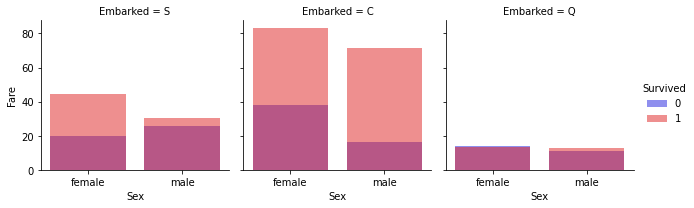

In [94]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'b', 1: 'r'})
# sns.barplot条形图函数，Embarked，Survived，Sex，Fare四者间的关系
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### （6）整理、清洗数据

**删除无用特征**

注意一起删除训练集和测试集合的无用特征

In [95]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

((891, 10), (418, 9), (891, 10), (418, 9))

In [96]:
# 现在可以从训练和测试数据集中删除Name特征以及训练集中的PassengerId 特征
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

train_df.shape, test_df.shape

((891, 8), (418, 8))

**转换性别特征Sex**

In [97]:
# 将类别特征进行数字化
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])
combine = [train_df, test_df]

# 男性赋值为1，女性赋值为0，并转换为整型数据
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


**填补年龄特征Age的缺失值**
- 使用非空的age平均值进行填补

In [98]:
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


(array([ 50.,  33., 164., 358., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

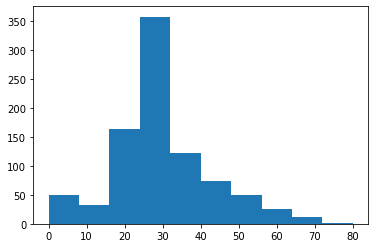

In [99]:
plt.hist(train_df['Age'])

In [100]:
# 根据样本分位数进行分箱，等频分箱
AgeBand = pd.qcut(train_df['Age'], 5)
# (-0.001, 20.0] , (20.0, 28.0] , (28.0, 29.0] , (29.0, 38.0] , (38.0, 80.0]
AgeBand 

0        (20.0, 28.0]
1        (29.0, 38.0]
2        (20.0, 28.0]
3        (29.0, 38.0]
4        (29.0, 38.0]
            ...      
886      (20.0, 28.0]
887    (-0.001, 20.0]
888      (28.0, 29.0]
889      (20.0, 28.0]
890      (29.0, 38.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 20.0] < (20.0, 28.0] < (28.0, 29.0] < (29.0, 38.0] < (38.0, 80.0]]

In [101]:
# 将这些年龄区间替换为序数
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 28), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 29), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 38), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 38, 'Age'] = 4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,S
1,1,1,0,3,1,0,71.2833,C
2,1,3,0,1,0,0,7.9250,S
3,1,1,0,3,1,0,53.1000,S
4,0,3,1,3,0,0,8.0500,S


**结合SibSp和Parch特征创建一个新特征FamilySize，意为包括兄弟姐妹、配偶、父母、孩子和自己的所有家人数量**

In [102]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**创建一个新特征IsAlone，取值为0表示不是独自一人，取值为1表示独自一人**

In [103]:
# 创建新特征IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


**舍弃 Parch、SibSp 和 FamilySize 特征，转而支持 IsAlone，因为 IsAlone 更能反映其与Survived的相关性**

In [104]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,1,7.2500,S,0
1,1,1,0,3,71.2833,C,0
2,1,3,0,1,7.9250,S,1
3,1,1,0,3,53.1000,S,0
4,0,3,1,3,8.0500,S,1


**填补分类特征Embarked**

登船港口特征Embarked，有三种可能取值 S、Q、C。仅训练数据集有两个缺失值，采用众数填补缺失值。

In [105]:
# freq_port 找到众数
freq_port = train_df.Embarked.dropna().mode()[0] 
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [106]:
# 同样转换分类特征为序数
encoder = LabelEncoder()

for dataset in combine:
    dataset['Embarked'] = encoder.fit_transform(dataset['Embarked'])

# 'S': 2, 'C': 0, 'Q': 1
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,1,7.2500,2,0
1,1,1,0,3,71.2833,0,0
2,1,3,0,1,7.9250,2,1
3,1,1,0,3,53.1000,2,0
4,0,3,1,3,8.0500,2,1


**对票价Fare进行分箱并替换为序数**

In [107]:
# 测试集中Fare有一个缺失值，用中位数进行填补
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,1,3,7.8292,1,1
1,893,3,0,4,7.0000,2,0
2,894,2,1,4,9.6875,1,1
3,895,3,1,1,8.6625,2,1
4,896,3,0,1,12.2875,2,0


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

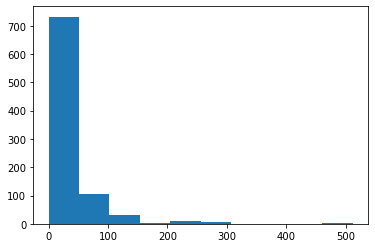

In [108]:
plt.hist(train_df['Fare'])

In [109]:
# 根据样本分位数进行分箱，等频分箱
FareBand = pd.qcut(train_df['Fare'], 4)
# (-0.001, 7.91] , (7.91, 14.454] , (14.454, 31.0] , (31.0, 512.329]
FareBand  

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [110]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,1,0,2,0
1,1,1,0,3,3,0,0
2,1,3,0,1,1,2,1
3,1,1,0,3,3,2,0
4,0,3,1,3,1,2,1
5,0,3,1,2,1,1,1
6,0,1,1,4,3,2,1
7,0,3,1,0,2,2,0
8,1,3,0,1,1,2,0
9,1,2,0,0,2,0,0


In [111]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,1,3,0,1,1
1,893,3,0,4,0,2,0
2,894,2,1,4,1,1,1
3,895,3,1,1,1,2,1
4,896,3,0,1,1,2,0
5,897,3,1,0,1,2,1
6,898,3,0,3,0,1,1
7,899,2,1,1,2,2,0
8,900,3,0,0,0,0,1
9,901,3,1,1,2,2,0


### （7）构建模型并预测结果

我们的问题是想确定输出（幸存与否）与其他变量或特征（性别、年龄、票价等级...）之间的关系，这属于典型的分类和回归问题。 
 
 当使用给定的数据集训练我们的模型时，我们称为监督式学习的机器学习。这样，模型主要有：

- 逻辑回归
- KNN 或 k-最近邻
- 随机森林

In [112]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

**逻辑回归**

逻辑回归是以线性回归为理论支持，但又通过sigmoid函数（逻辑回归函数）引入非线性因素，用来测量分类因变量和一个或多个自变量关系的模型，最常见的就是用来处理二分类问题。我们关注模型基于训练集生成的置信度分数。 

In [113]:
# 逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)  # logreg.predict_proba(X_test)[:,1]
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.24

可以使用逻辑回归中特征的系数，来验证我们对特征创建和完成目标的假设正确与否。

正系数会增加响应的对数几率（从而增加概率），而负系数会降低响应的对数几率（从而降低概率）。

- Sex是最高的负系数，意味着随着性别值的增加（男性：1 到女性：0），Survived=1 的概率减少；
- 随着 Pclass 的增加，Survived=1 的概率降低越多；
- Age是第二高的负相关特征，即随着年龄的增加，Survived=1 的概率降低越多，幸存概率越小； 

In [114]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
1,Sex,-2.516708
0,Pclass,-1.061333
4,Embarked,-0.267756
2,Age,-0.211843
5,IsAlone,-0.071642
3,Fare,-0.038073


**KNN**

k近邻算法是一种用于分类和回归的非参数方法。其基本思想是：在特征空间中，如果一个样本附近的k个最近样本的大多数属于某一个类别，则该样本也属于这个类别。可以看到，KNN 置信度得分优于逻辑回归。 

In [115]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.61

**随机森林**

随机森林是一种用于分类、回归和其他任务的集成学习方法。它通过自助法（bootstrap）重采样技术，从原始训练样本集中有放回地重复随机抽取n个样本生成新的训练样本集合训练决策树，然后按以上步骤生成m棵决策树组成随机森林，新数据的分类结果按分类树投票多少形成的分数而定。其实质是对决策树算法的一种改进，将多个决策树合并在一起，每棵树的建立依赖于独立抽取的样本。模型置信度得分是目前评估的模型中最高的。 

决策树补充：决策树是将特征（树枝）映射到目标值（树叶）的分类或回归方法。目标变量可以取一组有限值的树模型称为分类树；在这些树结构中，叶子代表类标签，分支代表导致这些类标签的特征的结合。目标变量可以取连续值的决策树称为回归树。

In [118]:
# 随机森林 
# n_estimators：树木的数量，即基评估器的数量
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

预测数据展示

In [123]:
# 导入 sklearn的PCA算法
from sklearn.decomposition import PCA
# 使用PCA算法，n_components：保留的主成分数量
#             whiten白化：降维后的数据的每个特征进行归一化，让期望为0，方差为1
pca = PCA(n_components=2, whiten='True')
x_pca = pca.fit_transform(X_test)

In [133]:
pred_tmp = pd.DataFrame()
pred_tmp["x1"] = x_pca[:, 0]
pred_tmp["x2"] = x_pca[:, 1]
pred_tmp["Survived"] = Y_pred

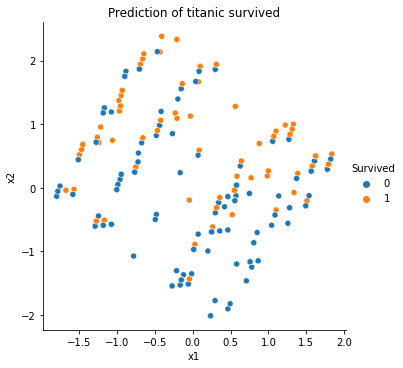

In [134]:
sns.relplot(x="x1", y="x2", hue="Survived", data=pred_tmp)

plt.title("Prediction of titanic survived")
plt.show()

### （8）模型评估

我们现在可以对所有模型评估结果进行排名，以选择最适合我们问题的模型。

In [117]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Score': [acc_knn, acc_log, acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,86.76
0,Logistic Regression,83.61
1,KNN,79.24
